In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import os
import textwrap

In [42]:
%pip install gseapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.6 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 31.9 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [46]:
de = pd.read_csv('/home/jrlab2019/youtube/deseq/DE_results.csv')
de

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
0,ENSG00000160072,320.481168,-0.492442,0.165330,-2.978533,0.002896,0.036899,ATAD3B
1,ENSG00000041988,103.354977,-0.282331,0.168099,-1.679553,0.093044,0.359646,THAP3
2,ENSG00000225630,922.811465,0.733032,0.375566,1.951807,0.050961,0.256948,MTND2P28
3,ENSG00000131584,735.890219,-0.053477,0.219621,-0.243496,0.807621,0.938042,ACAP3
4,ENSG00000169972,135.304763,-0.154869,0.187044,-0.827982,0.407681,0.727888,PUSL1
...,...,...,...,...,...,...,...,...
10926,ENSG00000198786,45775.084126,0.165326,0.206643,0.800055,0.423679,0.738798,ND5
10927,ENSG00000198695,10271.242782,0.184644,0.222985,0.828053,0.407640,0.727888,ND6
10928,ENSG00000198727,46929.471443,0.271033,0.258781,1.047347,0.294939,0.633176,CYTB
10929,ENSG00000210196,77.259551,0.454467,0.249443,1.821928,0.068466,0.304236,NaN


In [64]:
class gseapy_helper:
    def __init__(self, de, pvalue = 'padj', log2fc = 'log2FoldChange', log2fc_thresh = 0.5):
        self.de = de
        self.up = de[(de[pvalue] < 0.05) & (de[log2fc] > 0) & (abs(de[log2fc]) > log2fc_thresh)]
        self.down = de[(de[pvalue] < 0.05) & (de[log2fc] < 0) & (abs(de[log2fc]) > log2fc_thresh)]
        
        
    

In [69]:
a = gseapy_helper(de)

In [67]:
import gseapy as gp

In [85]:
enr = gp.enrichr(gene_list= a.up.dropna()['Unnamed: 0'].tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = 'hsapiens_gene_ensembl'
                )

In [86]:


enr.results



,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


In [81]:
gp.enrichr?

In [ ]:
enr = gp.enrichr(gene_list= dedf[dedf.log2fc > 0].gene.tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )

In [3]:
df = pd.read_csv('/home/jrlab2019/youtube/deseq/GO/go_results.csv')

In [4]:
df

,Unnamed: 0,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
0,GO:1901136,GO:1901136,carbohydrate derivative catabolic process,16/366,182/20973,1.355843e-07,0.000502,0.000449,ENSG00000117151/ENSG00000177628/ENSG0000017916...,16
1,GO:0006026,GO:0006026,aminoglycan catabolic process,7/366,32/20973,1.075745e-06,0.001993,0.001782,ENSG00000117151/ENSG00000179163/ENSG0000017026...,7
2,GO:0030193,GO:0030193,regulation of blood coagulation,9/366,67/20973,2.384558e-06,0.002152,0.001924,ENSG00000135919/ENSG00000078098/ENSG0000000156...,9
3,GO:1900046,GO:1900046,regulation of hemostasis,9/366,69/20973,3.065116e-06,0.002152,0.001924,ENSG00000135919/ENSG00000078098/ENSG0000000156...,9
4,GO:1904036,GO:1904036,negative regulation of epithelial cell apoptot...,8/366,52/20973,3.068601e-06,0.002152,0.001924,ENSG00000171951/ENSG00000003402/ENSG0000010950...,8
5,GO:1904035,GO:1904035,regulation of epithelial cell apoptotic process,11/366,111/20973,3.921030e-06,0.002152,0.001924,ENSG00000171951/ENSG00000003402/ENSG0000010950...,11
6,GO:0050818,GO:0050818,regulation of coagulation,9/366,72/20973,4.396501e-06,0.002152,0.001924,ENSG00000135919/ENSG00000078098/ENSG0000000156...,9
7,GO:0006027,GO:0006027,glycosaminoglycan catabolic process,6/366,26/20973,4.645857e-06,0.002152,0.001924,ENSG00000179163/ENSG00000170266/ENSG0000012741...,6
8,GO:0050900,GO:0050900,leukocyte migration,22/366,445/20973,1.306079e-05,0.005378,0.004809,ENSG00000184371/ENSG00000143669/ENSG0000017762...,22
9,GO:0014902,GO:0014902,myotube differentiation,11/366,132/20973,2.070693e-05,0.006624,0.005923,ENSG00000134243/ENSG00000170417/ENSG0000000313...,11


In [40]:
def plot_go(data, description = 'Description', pvalue = 'p.adjust', to_show = 10,
           
            up_and_down = None,
           plot_width = 4,
            plot_height = None,
            wrap_length = 30,
           top_right_frame = None):
    
    
    df = data.copy(deep = True)
    df['nlog10'] = -np.log10(df[pvalue])
    df = df.sort_values('nlog10', ascending = False).reset_index(drop = True)
    
    
    
    if plot_height is None:
        plot_height = to_show * .6
    
    
    plt.figure(figsize = (plot_width, plot_height))
    
    ax = sns.barplot(data = df[:to_show], x = 'nlog10', y = description,
                    edgecolor = 'k', lw = 2, color = 'dimgrey')
    
    
    
    ax.set_yticklabels([textwrap.fill(e, wrap_length) for e in df[:to_show][description]])
    
    
    #make things pretty
    for axis in ['bottom', 'left', 'top', 'right']:
        ax.spines[axis].set_linewidth(2)
        
    if not top_right_frame:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        
    ax.tick_params(width = 2)
    plt.xticks(size = 11, weight = 'bold')
    plt.yticks(size = 11, weight = 'bold')
    plt.xlabel("$-log_{10}$ P", size = 14)
    plt.ylabel("")
    
    
    
    plt.show()
    

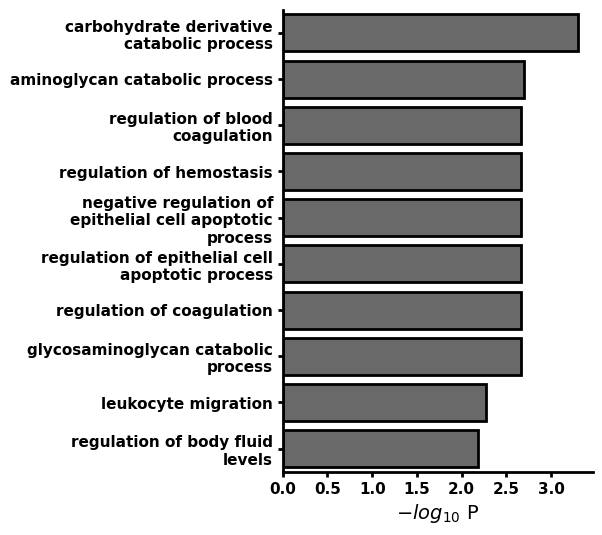

In [41]:
plot_go(df)